In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import datetime as dt

In [3]:
#! pip install yfinance

# The following tasks are to be performed:
## For Amazon
### 1. Read the Data from Yahoo finance website directly.

In [4]:
import yfinance as yf

In [5]:

Amazon = yf.Ticker("AMZN")
amzn = pd.DataFrame(Amazon.history(period = "2y"))
amzn

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-10 00:00:00-05:00,158.350006,160.716507,157.750000,159.003494,68268000,0.0,0.0
2022-02-11 00:00:00-05:00,158.134506,159.000000,152.733994,153.293503,77100000,0.0,0.0
2022-02-14 00:00:00-05:00,151.751007,158.448502,151.649994,155.167007,83230000,0.0,0.0
2022-02-15 00:00:00-05:00,157.605499,158.007004,154.637497,156.510498,56440000,0.0,0.0
2022-02-16 00:00:00-05:00,155.790497,158.834000,154.734497,158.100494,52704000,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,170.199997,170.550003,167.699997,170.309998,55081300,0.0,0.0
2024-02-06 00:00:00-05:00,169.389999,170.710007,167.649994,169.149994,42505500,0.0,0.0
2024-02-07 00:00:00-05:00,169.479996,170.880005,168.940002,170.529999,47174100,0.0,0.0


### 2. Perform Cleaning

In [6]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-02-10 00:00:00-05:00 to 2024-02-09 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Volume        502 non-null    int64  
 5   Dividends     502 non-null    float64
 6   Stock Splits  502 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.4 KB


In [7]:
amzn.index

DatetimeIndex(['2022-02-10 00:00:00-05:00', '2022-02-11 00:00:00-05:00',
               '2022-02-14 00:00:00-05:00', '2022-02-15 00:00:00-05:00',
               '2022-02-16 00:00:00-05:00', '2022-02-17 00:00:00-05:00',
               '2022-02-18 00:00:00-05:00', '2022-02-22 00:00:00-05:00',
               '2022-02-23 00:00:00-05:00', '2022-02-24 00:00:00-05:00',
               ...
               '2024-01-29 00:00:00-05:00', '2024-01-30 00:00:00-05:00',
               '2024-01-31 00:00:00-05:00', '2024-02-01 00:00:00-05:00',
               '2024-02-02 00:00:00-05:00', '2024-02-05 00:00:00-05:00',
               '2024-02-06 00:00:00-05:00', '2024-02-07 00:00:00-05:00',
               '2024-02-08 00:00:00-05:00', '2024-02-09 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=502, freq=None)

In [8]:
amzn.dropna(inplace = True, axis = 0)

In [9]:
amzn.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [10]:
amzn['Volume'] = amzn['Volume'].astype(float)

In [11]:
amzn.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object

In [12]:
amzn = amzn.round(2)

In [13]:
amzn

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-10 00:00:00-05:00,158.35,160.72,157.75,159.00,68268000.0,0.0,0.0
2022-02-11 00:00:00-05:00,158.13,159.00,152.73,153.29,77100000.0,0.0,0.0
2022-02-14 00:00:00-05:00,151.75,158.45,151.65,155.17,83230000.0,0.0,0.0
2022-02-15 00:00:00-05:00,157.61,158.01,154.64,156.51,56440000.0,0.0,0.0
2022-02-16 00:00:00-05:00,155.79,158.83,154.73,158.10,52704000.0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,170.20,170.55,167.70,170.31,55081300.0,0.0,0.0
2024-02-06 00:00:00-05:00,169.39,170.71,167.65,169.15,42505500.0,0.0,0.0
2024-02-07 00:00:00-05:00,169.48,170.88,168.94,170.53,47174100.0,0.0,0.0


### 3. What was the change in stock price over time?

In [14]:
amzn.iloc[-120:].describe().astype(int)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,120,120,120,120,120,120,120
mean,142,144,141,143,50547191,0,0
std,11,11,11,11,16354108,0,0
min,120,121,118,119,22378400,0,0
25%,133,134,131,133,41927900,0,0
50%,142,144,141,143,46617250,0,0
75%,151,152,149,151,55193125,0,0
max,170,175,170,174,125309300,0,0


**For the 75% of the times in past 4 months closing price of the Amazon stock is below 148 dollars and it clocked the maximum of
171 dollars with the volume of 125309300. On an average 50417242 of volume is being traded for $141.**

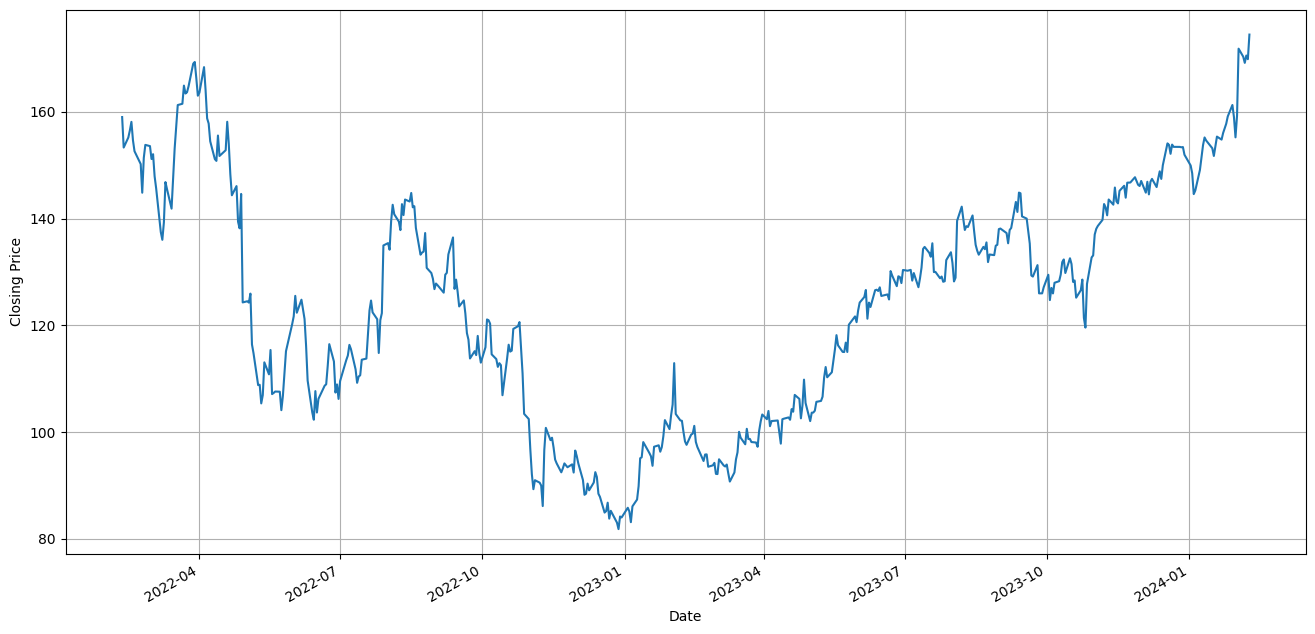

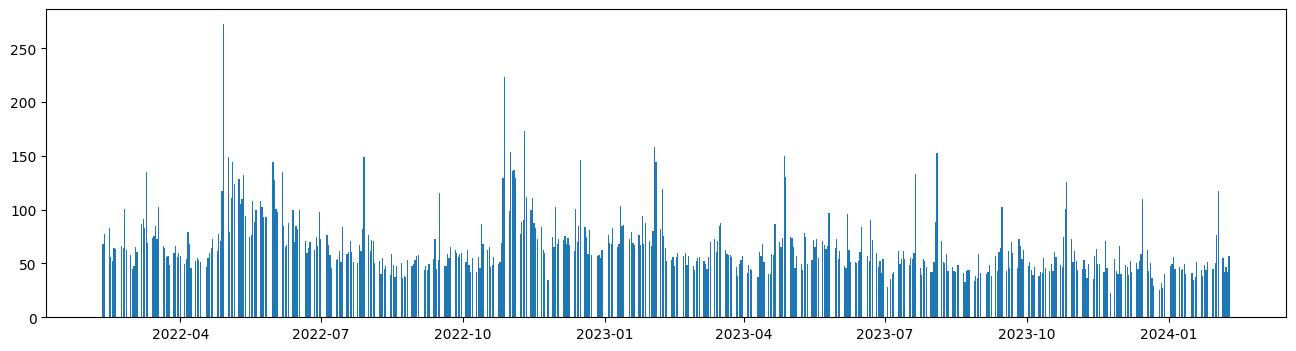

In [15]:
amzn['Close'].plot(figsize = (16,8), grid = 'Axis grid lines')
plt.ylabel("Closing Price")
f,ax = plt.subplots(figsize = (16,4))
amzn_volume_change3 = plt.bar(data = amzn, height = (amzn["Volume"]/1000000) , x = amzn.index, width = 0.8)
plt.show()

**From October 2022 to June 2023 we can see the decline in price this move may be the result of increasing Ukraine-Russia War tensions, 
beginnig of the bear market, rising inflation rates and increasing unemployment crisis. Although the trend seems
to go upward from December 2023 due the constant infation rates for the quarter.**

### 4. Visualize the change in a stock’s volume being traded, over time?

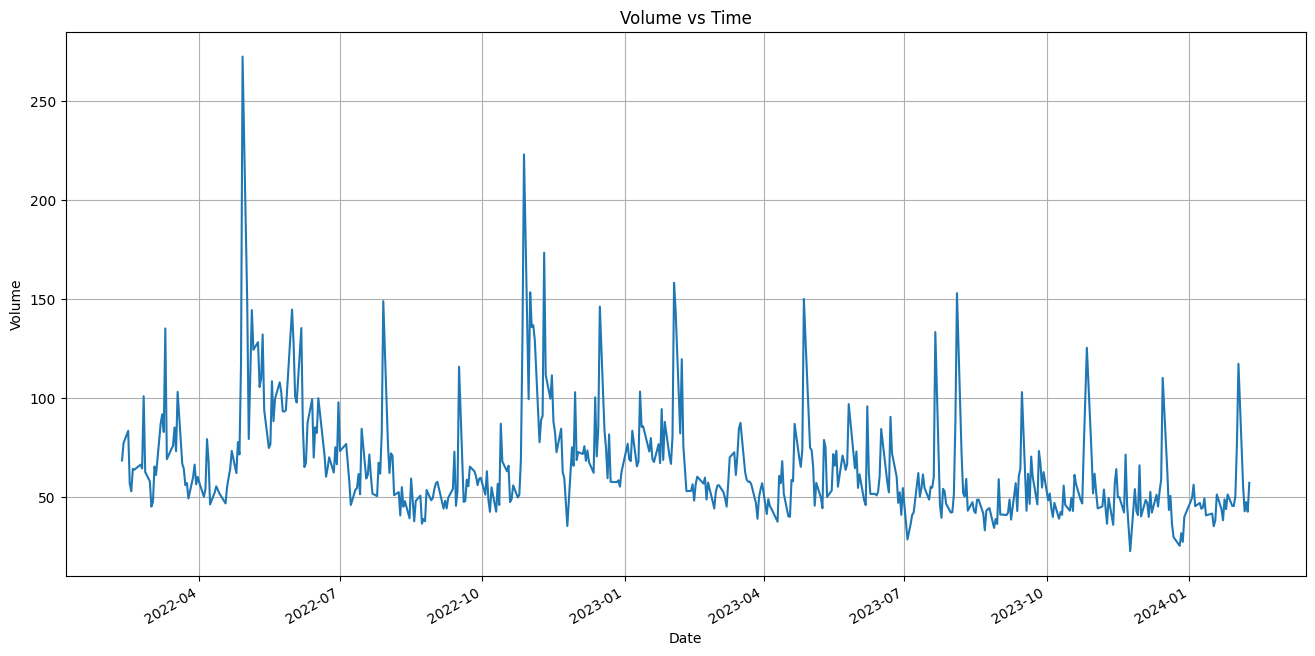

In [16]:
#amzn['Volume'].hist(bins = 50, figsize = (10,5))
(amzn['Volume']/1000000).plot(figsize = (16,8), grid ="Axis grid lines")
plt.ylabel("Volume")
plt.title("Volume vs Time")

plt.show()


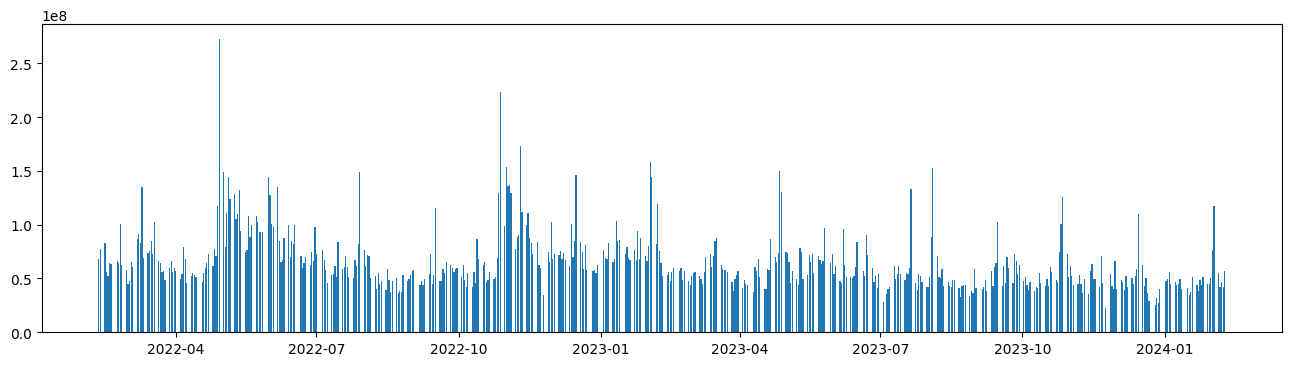

In [17]:
f,ax = plt.subplots(figsize = (16,4))
amzn_volume_change3 = plt.bar(data = amzn, height = amzn["Volume"] , x = amzn.index, width = 0.8,)

plt.show()

**Between May 2022 and August 2022 there was a sudden major drop in volume which can be correlated with the above price 
chart as the beginning of the bear cycle along with soaring inflation rates and Russia-Ukraine war since then the volume 
has been consistently droped till June 2023 and now the market is adjusting itself.**

### 5. What was the moving average of various stocks?

In [18]:
amznMa = amzn['Close'].to_frame()
amznMa['SMA'] = amzn['Close'].rolling(30).mean()
amznMa.dropna(inplace = True)
amznMa


,Close,SMA
Date,,
2022-03-24 00:00:00-04:00,163.65,151.970667
2022-03-25 00:00:00-04:00,164.77,152.163000
2022-03-28 00:00:00-04:00,168.99,152.686333
2022-03-29 00:00:00-04:00,169.32,153.158000
2022-03-30 00:00:00-04:00,166.30,153.484333
...,...,...
2024-02-05 00:00:00-05:00,170.31,154.888333
2024-02-06 00:00:00-05:00,169.15,155.398667
2024-02-07 00:00:00-05:00,170.53,155.969000


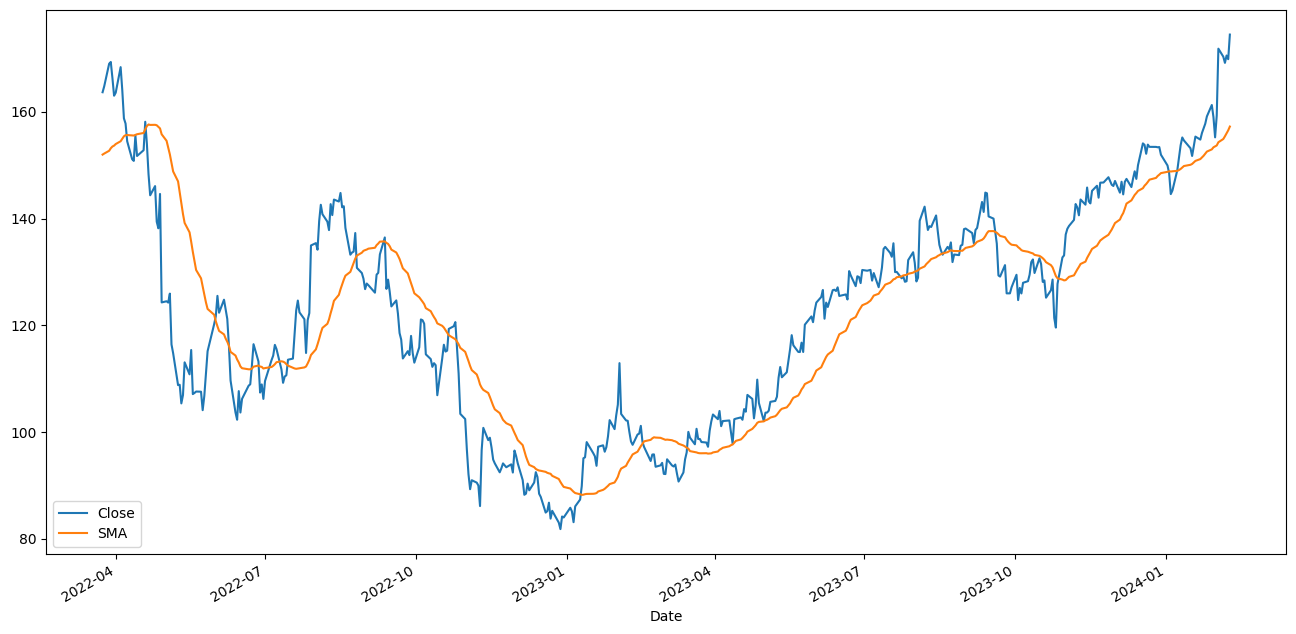

In [19]:
amznMa[['Close','SMA']] = amznMa.plot(figsize = (16,8))

**30 days simple moving average has been plotted against the price and time. It shows that the moving average line can act as the great indicator for trend reversal and also acting firstly as a resistance line indicating down trend in the market and after testing it for few times the same moving average line is acting as a support line indicating the beginning the uptrend.**

### 6. What was the daily return average of a stock?

In [20]:

dr = amzn['Close'].pct_change()*100
dr
daily_return_avg = dr.mean()
daily_return_avg

0.05197280987373525

### 7. Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [21]:

amzn['Daily_Return'] = dr
amzn.dropna(inplace = True)
amzn

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return
Date,,,,,,,,
2022-02-11 00:00:00-05:00,158.13,159.00,152.73,153.29,77100000.0,0.0,0.0,-3.591195
2022-02-14 00:00:00-05:00,151.75,158.45,151.65,155.17,83230000.0,0.0,0.0,1.226434
2022-02-15 00:00:00-05:00,157.61,158.01,154.64,156.51,56440000.0,0.0,0.0,0.863569
2022-02-16 00:00:00-05:00,155.79,158.83,154.73,158.10,52704000.0,0.0,0.0,1.015910
2022-02-17 00:00:00-05:00,158.15,160.35,154.50,154.65,64032000.0,0.0,0.0,-2.182163
...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,170.20,170.55,167.70,170.31,55081300.0,0.0,0.0,-0.873057
2024-02-06 00:00:00-05:00,169.39,170.71,167.65,169.15,42505500.0,0.0,0.0,-0.681111
2024-02-07 00:00:00-05:00,169.48,170.88,168.94,170.53,47174100.0,0.0,0.0,0.815844


In [22]:
def trend(x):
    if x > -0.5 and x < 0.5:
        return("Slight or No Change")
    elif x > 0.5 and x < 1:
        return("Slight Positive")
    elif x > -1 and x < -0.5:
        return("Slight Negative")
    elif x > 1 and x < 3:
        return("Positive")
    elif x > -3 and x < -1:
        return("Negative")
    elif x > 3 and x < 7:
        return("Among Top Gainers")
    elif x > -7 and x < -3:
        return("Among Top Lossers")
    elif x > 3 and x < 7:
        return("Among Top Gainers")
    elif x > 7:
        return("Bull Run")
    elif x < -7:
        return("Bear Drop")



In [23]:
amzn['Trend'] = np.zeros(amzn['Daily_Return'].count())
for i in amzn['Trend']:
    amzn['Trend'] = amzn['Daily_Return'].apply(lambda x:trend(x))



In [24]:
amzn

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Trend
Date,,,,,,,,,
2022-02-11 00:00:00-05:00,158.13,159.00,152.73,153.29,77100000.0,0.0,0.0,-3.591195,Among Top Lossers
2022-02-14 00:00:00-05:00,151.75,158.45,151.65,155.17,83230000.0,0.0,0.0,1.226434,Positive
2022-02-15 00:00:00-05:00,157.61,158.01,154.64,156.51,56440000.0,0.0,0.0,0.863569,Slight Positive
2022-02-16 00:00:00-05:00,155.79,158.83,154.73,158.10,52704000.0,0.0,0.0,1.015910,Positive
2022-02-17 00:00:00-05:00,158.15,160.35,154.50,154.65,64032000.0,0.0,0.0,-2.182163,Negative
...,...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,170.20,170.55,167.70,170.31,55081300.0,0.0,0.0,-0.873057,Slight Negative
2024-02-06 00:00:00-05:00,169.39,170.71,167.65,169.15,42505500.0,0.0,0.0,-0.681111,Slight Negative
2024-02-07 00:00:00-05:00,169.48,170.88,168.94,170.53,47174100.0,0.0,0.0,0.815844,Slight Positive


### 8.Visualize trend frequency through a Pie Chart.

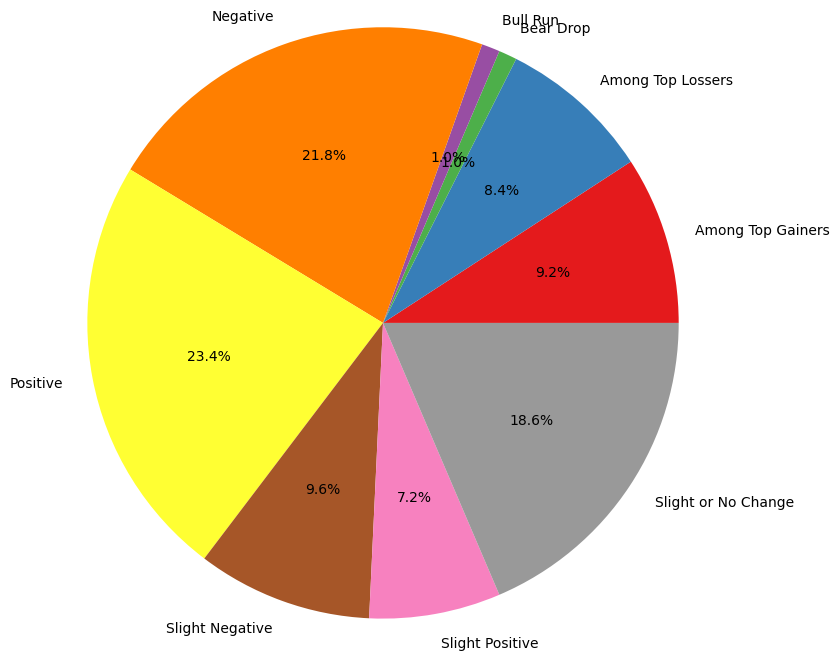

In [25]:
amzn_pie_data = amzn.groupby(['Trend'])
pie_label = sorted([i for i in amzn.loc[:, 'Trend'].unique()])
plt.pie(amzn_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2, colors=sns.color_palette('Set1'))

plt.show()

**For the period of two years the Amazon stock was the top gainer for 9.2% of the time and among top lossers for 8.4% of the time. The overall frequency of the stocks tends towards the positive return to the investors for the period of 2 years.**

# Google

In [26]:
# function to call the previous six months stock data:

def stock_data(ticker):
    yfData = yf.Ticker(ticker)
    prices = pd.DataFrame(yfData.history(period = "2y"))
    prices['Volume'] = prices['Volume'].astype(float)
    prices = prices.round(2)
    return prices
    

### 1. Read the Data from Yahoo finance website directly.
### 2. Perform cleaning.


In [27]:
google = stock_data("GOOG")
google

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-10 00:00:00-05:00,139.50,141.43,138.05,138.60,33018000.0,0.0,0.0
2022-02-11 00:00:00-05:00,138.75,139.28,133.29,134.13,38808000.0,0.0,0.0
2022-02-14 00:00:00-05:00,133.37,136.17,133.30,135.30,26792000.0,0.0,0.0
2022-02-15 00:00:00-05:00,137.47,137.90,135.54,136.43,26578000.0,0.0,0.0
2022-02-16 00:00:00-05:00,136.43,137.95,134.82,137.49,25610000.0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,144.04,146.67,143.91,144.93,29254400.0,0.0,0.0
2024-02-06 00:00:00-05:00,145.96,146.74,144.52,145.41,21517700.0,0.0,0.0
2024-02-07 00:00:00-05:00,146.12,147.00,145.21,146.68,21436100.0,0.0,0.0


### 3. What was the change in stock price over time?

In [28]:
def price_change(stock: str,stock_name):
    stock['Close'].plot(figsize = (16,8), grid = 'Axis grid lines', label = "%s"%(stock_name))
    plt.ylabel("Closing Price")
    


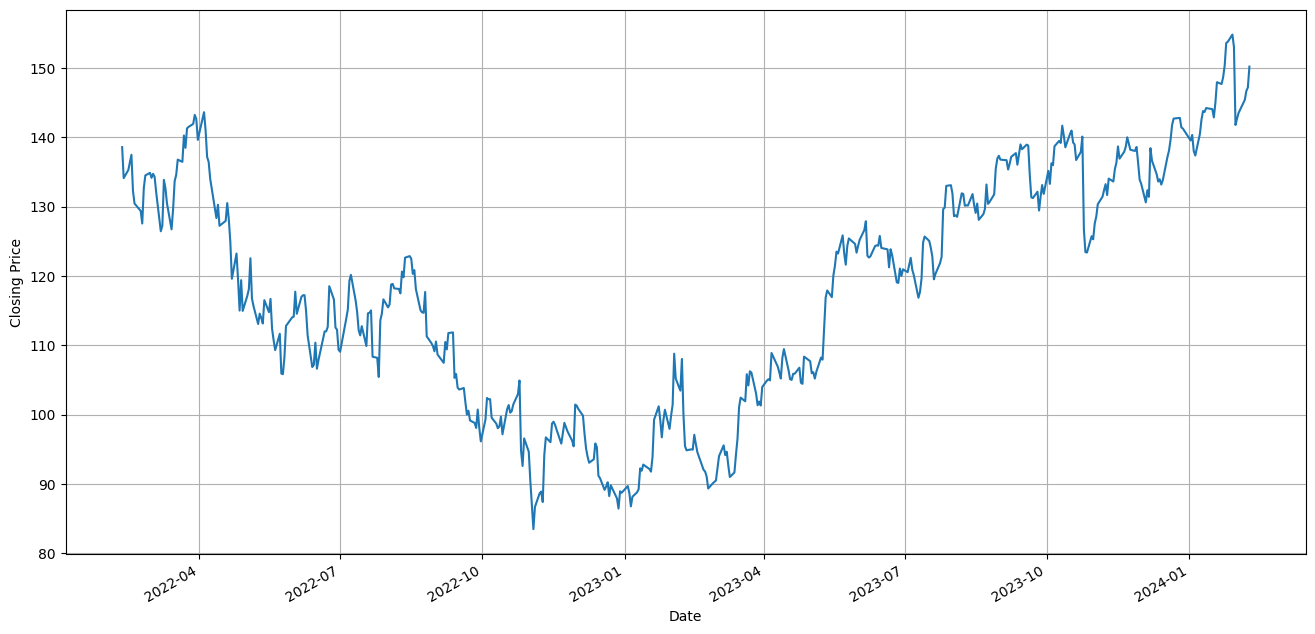

In [29]:
price_change(google,"Google")
plt.show()

**It occurs from the above chart that the price started recovering at the beginning of the second quarter of 2023 and now the price is testing its previous 2 year high.**

### 4. Visualize the change in a stock’s volume being traded, over time?

In [30]:
def vol_change(stock_name: str, title: str):
    (stock_name['Volume']/1000000).plot(figsize = (16,8), grid ="Axis grid lines", label = "%s"%(title))
    plt.ylabel("Volume")
    plt.title("Volume vs Time for %s"%(title))
    plt.show()
    


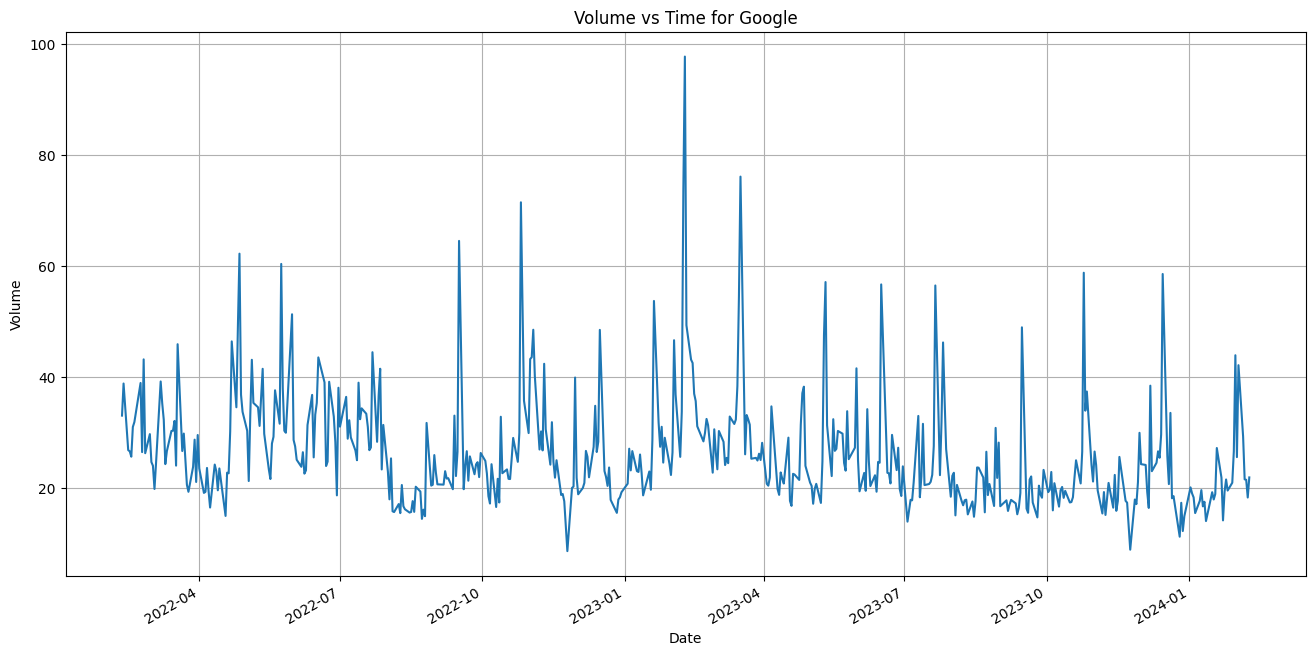

In [31]:
vol_change(google,"Google")

**The sudden surge in the month of February and March 2023 is giving the clear indication of reversal from the bottom and since then it is evident from the above chart the volume is entered consistently along with the price indicating a positive movement.**

### 5. What was the moving average of various stocks?

In [32]:
def SMA30(stock: str, title: str):
    stkMa = stock['Close'].to_frame()
    stkMa['SMA'] = stock['Close'].rolling(30).mean()
    stkMa.dropna(inplace = True)
    stkMa[['Close','SMA']]= stkMa.plot(figsize = (16,8), title = "%s's 30 days simple moving average"%(title))


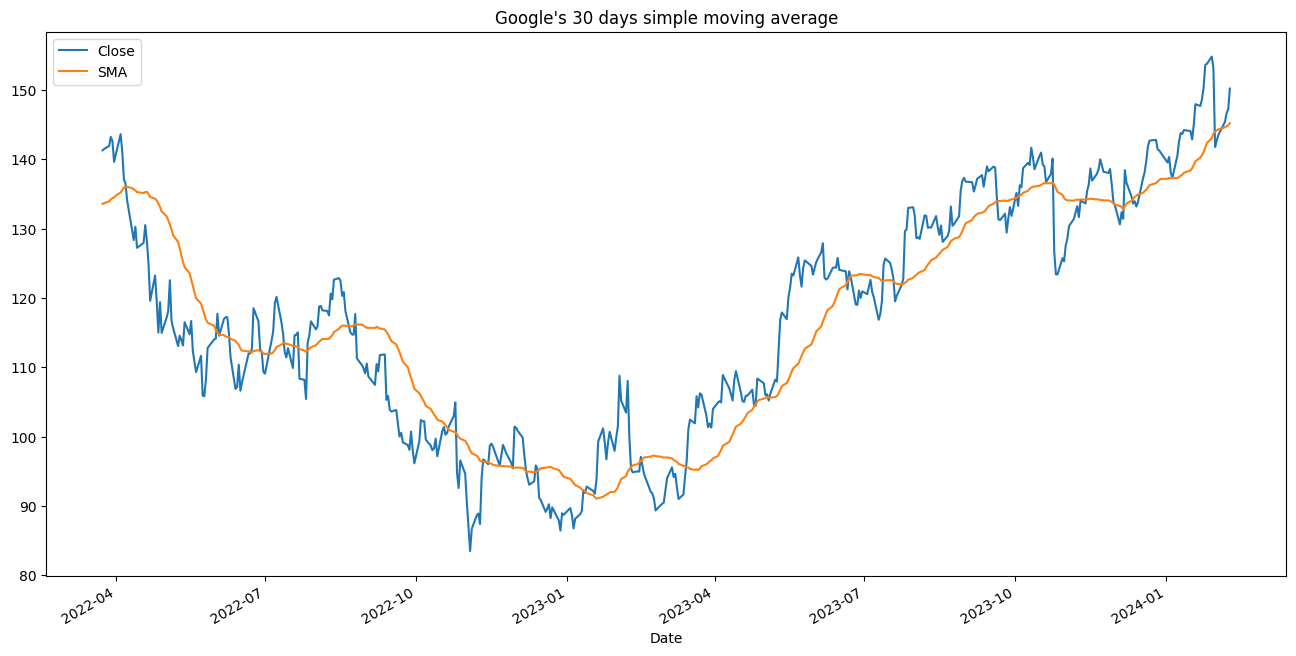

In [33]:
SMA30(google,"Google")

**The 30 days moving average is being tested continuously while the price was recovering yet the price is still showing an upward trend indicating few more tests with 30 days simple moving average if the price is being traded for few months above the moving average the a perfect upward movement is possible.**

### 6. What was the daily return average of a stock?

In [34]:
def d_return(name: str):
    dr = name['Close'].pct_change()*100
    dr.dropna(inplace = True)
    return dr



In [35]:
drg = google['Close'].pct_change()*100
drg
daily_return_avg = drg.mean()
daily_return_avg

0.039746583225538125

### 7. Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [36]:
google['Daily_Return'] = drg
google.dropna(inplace = True)
google

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return
Date,,,,,,,,
2022-02-11 00:00:00-05:00,138.75,139.28,133.29,134.13,38808000.0,0.0,0.0,-3.225108
2022-02-14 00:00:00-05:00,133.37,136.17,133.30,135.30,26792000.0,0.0,0.0,0.872288
2022-02-15 00:00:00-05:00,137.47,137.90,135.54,136.43,26578000.0,0.0,0.0,0.835181
2022-02-16 00:00:00-05:00,136.43,137.95,134.82,137.49,25610000.0,0.0,0.0,0.776955
2022-02-17 00:00:00-05:00,136.15,136.84,132.20,132.31,30968000.0,0.0,0.0,-3.767547
...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,144.04,146.67,143.91,144.93,29254400.0,0.0,0.0,0.968371
2024-02-06 00:00:00-05:00,145.96,146.74,144.52,145.41,21517700.0,0.0,0.0,0.331194
2024-02-07 00:00:00-05:00,146.12,147.00,145.21,146.68,21436100.0,0.0,0.0,0.873392


In [37]:
google['Trend'] = np.zeros(google['Daily_Return'].count())
for i in google['Trend']:
    google['Trend'] = google['Daily_Return'].apply(lambda x:trend(x))



In [38]:

google

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Trend
Date,,,,,,,,,
2022-02-11 00:00:00-05:00,138.75,139.28,133.29,134.13,38808000.0,0.0,0.0,-3.225108,Among Top Lossers
2022-02-14 00:00:00-05:00,133.37,136.17,133.30,135.30,26792000.0,0.0,0.0,0.872288,Slight Positive
2022-02-15 00:00:00-05:00,137.47,137.90,135.54,136.43,26578000.0,0.0,0.0,0.835181,Slight Positive
2022-02-16 00:00:00-05:00,136.43,137.95,134.82,137.49,25610000.0,0.0,0.0,0.776955,Slight Positive
2022-02-17 00:00:00-05:00,136.15,136.84,132.20,132.31,30968000.0,0.0,0.0,-3.767547,Among Top Lossers
...,...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,144.04,146.67,143.91,144.93,29254400.0,0.0,0.0,0.968371,Slight Positive
2024-02-06 00:00:00-05:00,145.96,146.74,144.52,145.41,21517700.0,0.0,0.0,0.331194,Slight or No Change
2024-02-07 00:00:00-05:00,146.12,147.00,145.21,146.68,21436100.0,0.0,0.0,0.873392,Slight Positive


### 8. Visualize trend frequency through a Pie Chart.

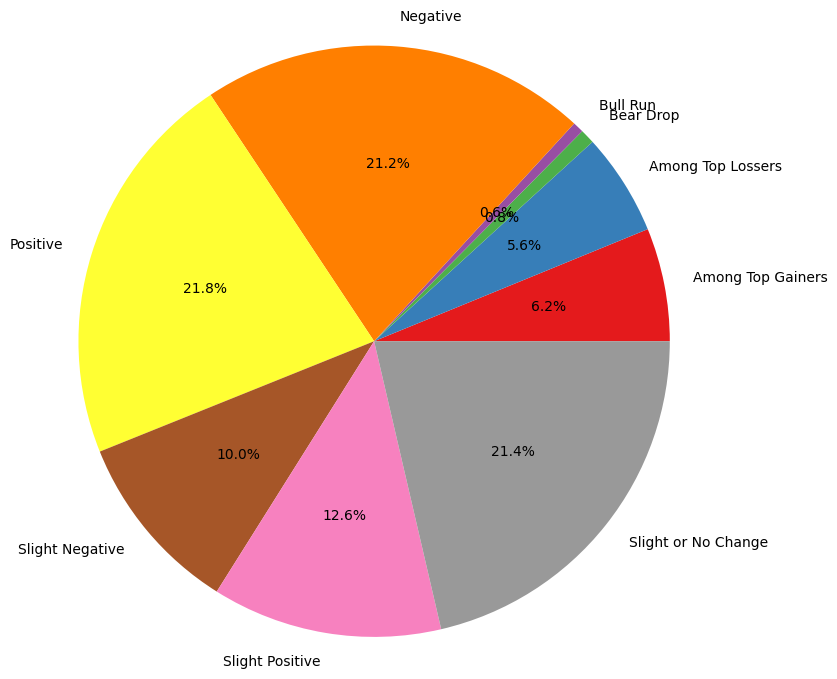

In [39]:
google_pie_data = google.groupby(['Trend'])
pie_label = sorted([i for i in google.loc[:, 'Trend'].unique()])
plt.pie(google_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2, colors=sns.color_palette('Set1'))

plt.show()

**There is no overall change in price for the past two years. In the two year time period the price however recovered to its previous high and is currently testing the two year high. For the long term investors there is no much of the gain however if someone has invested in the starting quarter of 2023 until this time the returns are very good for those.**

# Apple

### 1. Read the Data from Yahoo finance website directly.
### 2. Perform cleaning.


In [40]:
apple = stock_data("AAPL")
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-10 00:00:00-05:00,172.17,173.50,169.61,170.18,90865900.0,0.00,0.0
2022-02-11 00:00:00-05:00,170.38,171.12,166.14,166.73,98670700.0,0.00,0.0
2022-02-14 00:00:00-05:00,165.48,167.66,164.68,166.97,86185500.0,0.00,0.0
2022-02-15 00:00:00-05:00,169.04,171.00,168.33,170.84,62527400.0,0.00,0.0
2022-02-16 00:00:00-05:00,169.91,171.38,168.13,170.60,61177400.0,0.00,0.0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,187.91,189.01,185.60,187.44,69668800.0,0.00,0.0
2024-02-06 00:00:00-05:00,186.62,189.07,186.53,189.06,43490800.0,0.00,0.0
2024-02-07 00:00:00-05:00,190.40,190.81,188.37,189.17,53439000.0,0.00,0.0


### 3. What was the change in stock price over time?

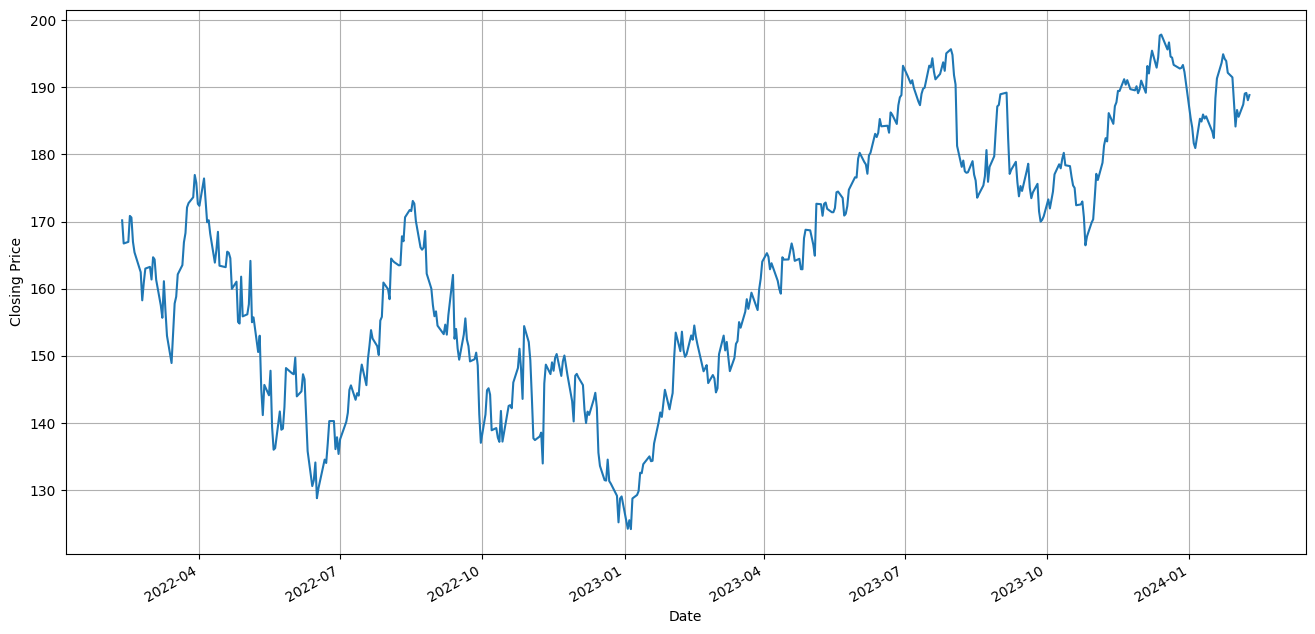

In [41]:
price_change(apple,"Apple")

**The previous high which was in the month of April 2022 is now acting as support and it occurs that there is a consolidation of the price for the time being. Price can still fall to check the support we recently stated about.**

### 4. Visualize the change in a stock’s volume being traded, over time?

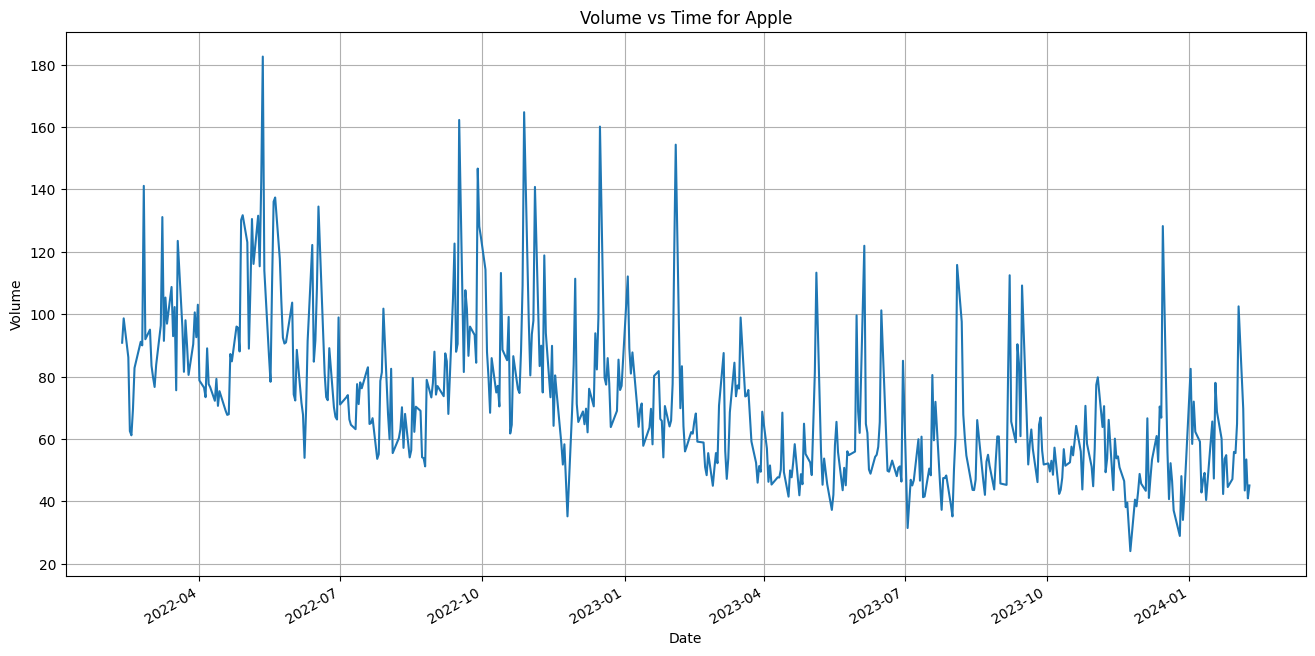

In [42]:
vol_change(apple,"Apple")

**Along with the price movement the volume doesn't seem to be affected which leads to an indication of false upward movement and the drop in the price for the next quarter.** 

### 5. What was the moving average of various stocks?

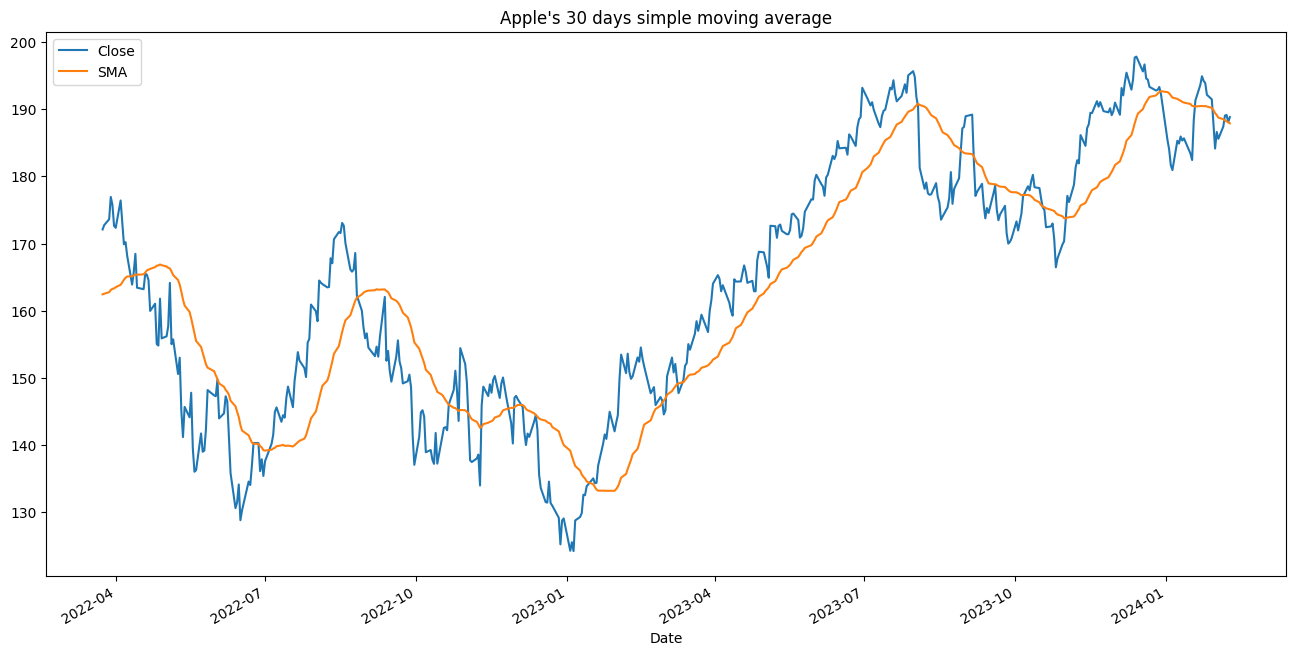

In [43]:
SMA30(apple,"Apple")

**The 30 days moving average is supporting the above two conclusions.**

### 6. What was the daily return average of a stock?

In [44]:
dr1 = apple['Close'].pct_change()*100
dr1
daily_return_avg = dr1.mean()
daily_return_avg

0.0369958494808395

### 7. Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [45]:
apple['Daily_Return'] = dr1
apple.dropna(inplace = True)

In [46]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return
Date,,,,,,,,
2022-02-11 00:00:00-05:00,170.38,171.12,166.14,166.73,98670700.0,0.00,0.0,-2.027265
2022-02-14 00:00:00-05:00,165.48,167.66,164.68,166.97,86185500.0,0.00,0.0,0.143945
2022-02-15 00:00:00-05:00,169.04,171.00,168.33,170.84,62527400.0,0.00,0.0,2.317782
2022-02-16 00:00:00-05:00,169.91,171.38,168.13,170.60,61177400.0,0.00,0.0,-0.140482
2022-02-17 00:00:00-05:00,169.10,169.97,166.57,166.97,69589300.0,0.00,0.0,-2.127784
...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,187.91,189.01,185.60,187.44,69668800.0,0.00,0.0,0.985938
2024-02-06 00:00:00-05:00,186.62,189.07,186.53,189.06,43490800.0,0.00,0.0,0.864277
2024-02-07 00:00:00-05:00,190.40,190.81,188.37,189.17,53439000.0,0.00,0.0,0.058183


In [47]:
apple['Trend'] = np.zeros(apple['Daily_Return'].count())
for i in apple['Trend']:
    apple['Trend'] = apple['Daily_Return'].apply(lambda x:trend(x))


In [48]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Trend
Date,,,,,,,,,
2022-02-11 00:00:00-05:00,170.38,171.12,166.14,166.73,98670700.0,0.00,0.0,-2.027265,Negative
2022-02-14 00:00:00-05:00,165.48,167.66,164.68,166.97,86185500.0,0.00,0.0,0.143945,Slight or No Change
2022-02-15 00:00:00-05:00,169.04,171.00,168.33,170.84,62527400.0,0.00,0.0,2.317782,Positive
2022-02-16 00:00:00-05:00,169.91,171.38,168.13,170.60,61177400.0,0.00,0.0,-0.140482,Slight or No Change
2022-02-17 00:00:00-05:00,169.10,169.97,166.57,166.97,69589300.0,0.00,0.0,-2.127784,Negative
...,...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,187.91,189.01,185.60,187.44,69668800.0,0.00,0.0,0.985938,Slight Positive
2024-02-06 00:00:00-05:00,186.62,189.07,186.53,189.06,43490800.0,0.00,0.0,0.864277,Slight Positive
2024-02-07 00:00:00-05:00,190.40,190.81,188.37,189.17,53439000.0,0.00,0.0,0.058183,Slight or No Change


### 8. Visualize trend frequency through a Pie Chart.

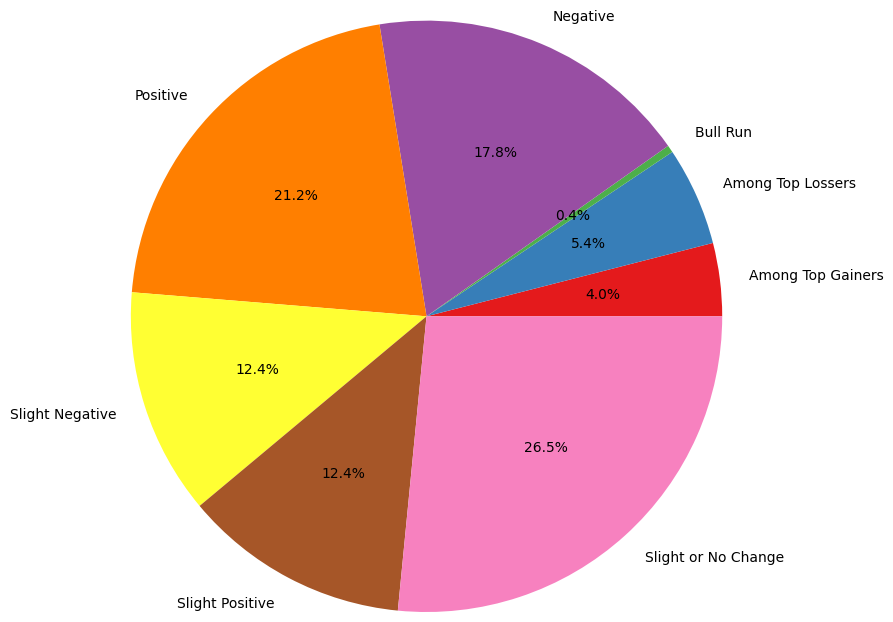

In [49]:
apple_pie_data = apple.groupby(['Trend'])
pie_label = sorted([i for i in apple.loc[:, 'Trend'].unique()])
plt.pie(apple_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2, colors=sns.color_palette('Set1'))

plt.show()

**Slight Positive, Slight Negative and Slight or No Change areas together depicts there is no change in price for almost 50% of the time which is exactly one year time period. The stock was in positive direction for 21.2% of the time however it does not affect the overall gain from apple stock since it was in the top lossers for 5.4% of the time which is greater than top gainers.**

# Microsoft

### 1. Read the Data from Yahoo finance website directly.
### 2. Perform cleaning.

In [50]:
msft = stock_data("MSFT")
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-10 00:00:00-05:00,298.57,303.56,295.29,296.94,45386200.0,0.00,0.0
2022-02-11 00:00:00-05:00,297.74,298.82,288.93,289.73,39175600.0,0.00,0.0
2022-02-14 00:00:00-05:00,288.48,291.42,286.11,289.69,36359500.0,0.00,0.0
2022-02-15 00:00:00-05:00,294.61,295.39,291.68,295.06,27058300.0,0.00,0.0
2022-02-16 00:00:00-05:00,293.61,296.07,288.99,294.72,29982100.0,0.62,0.0
...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,409.90,411.16,403.99,405.65,25352300.0,0.00,0.0
2024-02-06 00:00:00-05:00,405.88,407.97,402.91,405.49,18382600.0,0.00,0.0
2024-02-07 00:00:00-05:00,407.44,414.30,407.40,414.05,22340500.0,0.00,0.0


### 3.What was the change in stock price over time?

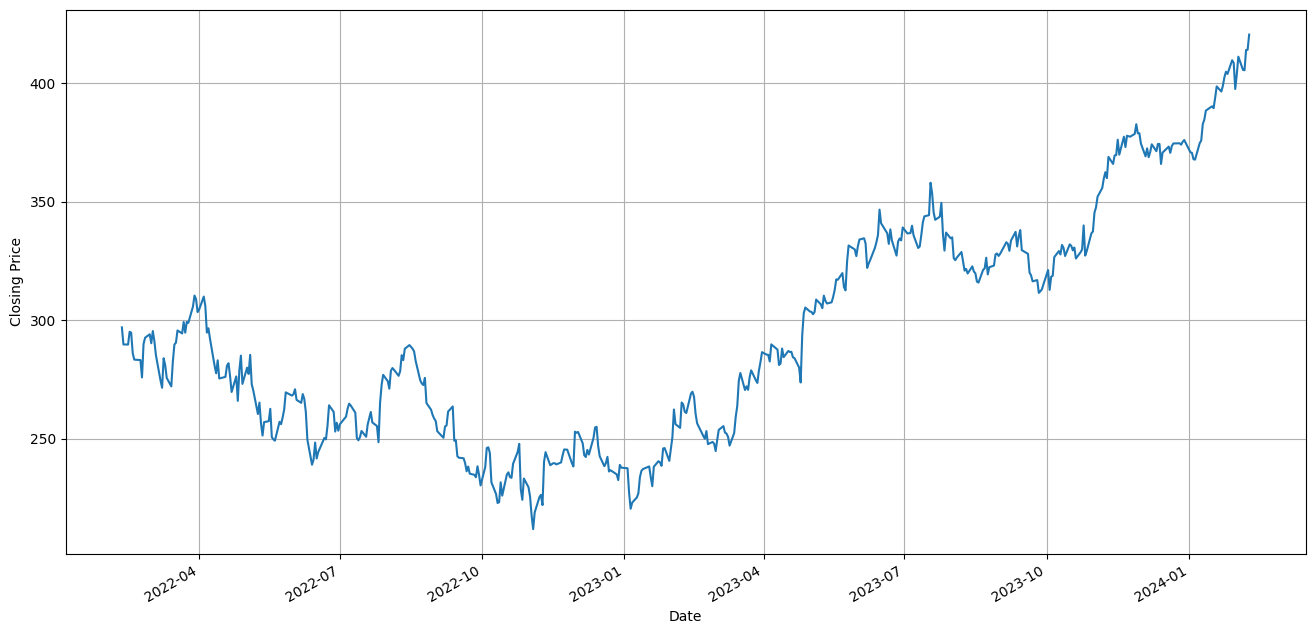

In [51]:
price_change(msft,"MSFT")

**Since the beginning of 2023 the Microsoft stock price is increasing for the constant time period and even after the correction in the last quarter of 2023 the price is moving with an upward trend.** 

### 4. Visualize the change in a stock’s volume being traded, over time?

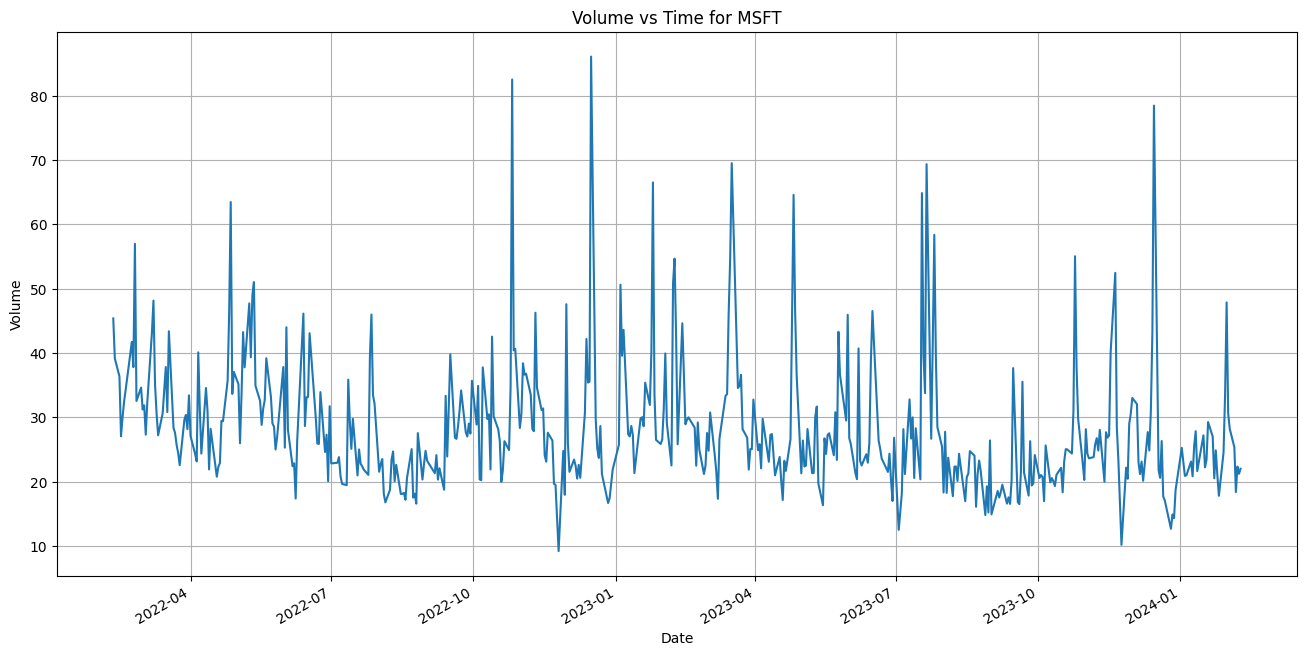

In [52]:
vol_change(msft,"MSFT")

**From the start of 2023 the volume is also showing us the upward trend this upward movement has been governed by sudden inflow of the volume being traded in the last quarter of 2022.**

### 5. What was the moving average of various stocks?

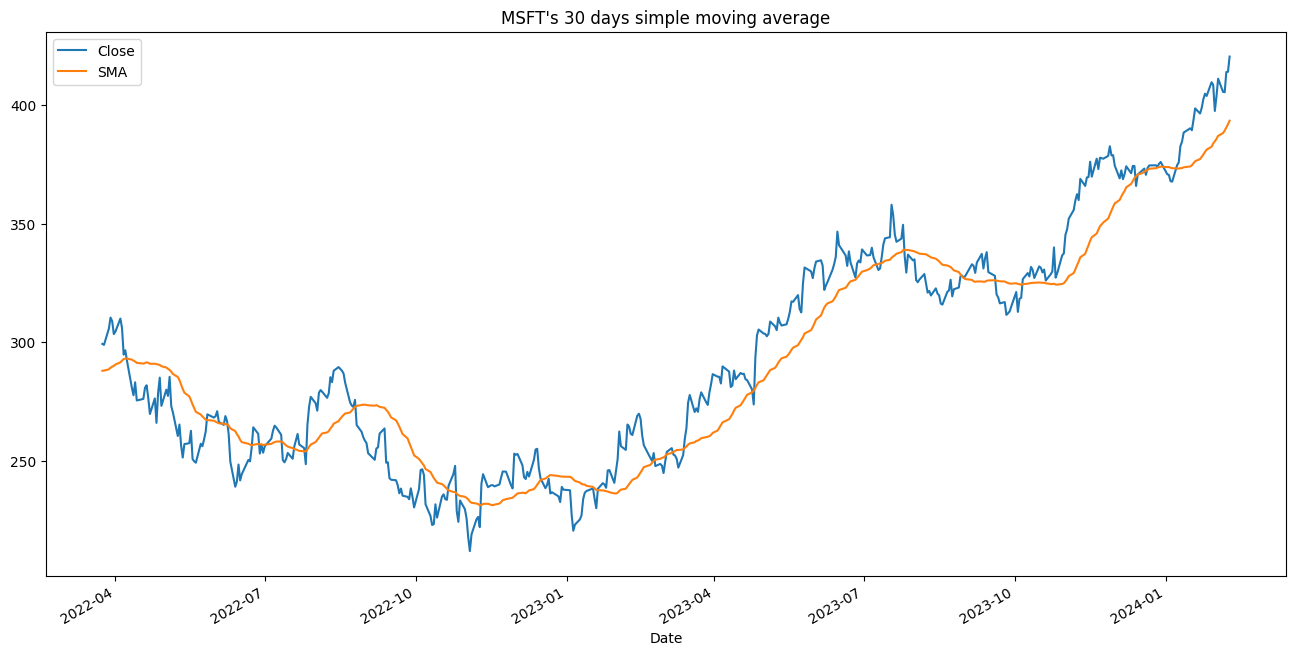

In [53]:
SMA30(msft,"MSFT")

**The 30 days moving average is supprting the above two conclusions even though the price came to test at the end of 2023 still 30 days simple moving average acted out as a strong supprt line.**

### 6. What was the daily return average of a stock?

In [54]:
dr2 = msft['Close'].pct_change()*100
dr2
daily_returnAvg = dr2.mean()
daily_returnAvg

0.08735773555942154

### 7. Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [55]:
msft['Daily_Return'] = dr2
msft.dropna(inplace = True)

In [56]:
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return
Date,,,,,,,,
2022-02-11 00:00:00-05:00,297.74,298.82,288.93,289.73,39175600.0,0.00,0.0,-2.428100
2022-02-14 00:00:00-05:00,288.48,291.42,286.11,289.69,36359500.0,0.00,0.0,-0.013806
2022-02-15 00:00:00-05:00,294.61,295.39,291.68,295.06,27058300.0,0.00,0.0,1.853706
2022-02-16 00:00:00-05:00,293.61,296.07,288.99,294.72,29982100.0,0.62,0.0,-0.115231
2022-02-17 00:00:00-05:00,291.63,292.06,285.37,286.09,32461600.0,0.00,0.0,-2.928203
...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,409.90,411.16,403.99,405.65,25352300.0,0.00,0.0,-1.354506
2024-02-06 00:00:00-05:00,405.88,407.97,402.91,405.49,18382600.0,0.00,0.0,-0.039443
2024-02-07 00:00:00-05:00,407.44,414.30,407.40,414.05,22340500.0,0.00,0.0,2.111026


In [57]:
msft['Trend'] = np.zeros(msft['Daily_Return'].count())
for i in msft['Trend']:
    msft['Trend'] = msft['Daily_Return'].apply(lambda x:trend(x))


In [58]:
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Trend
Date,,,,,,,,,
2022-02-11 00:00:00-05:00,297.74,298.82,288.93,289.73,39175600.0,0.00,0.0,-2.428100,Negative
2022-02-14 00:00:00-05:00,288.48,291.42,286.11,289.69,36359500.0,0.00,0.0,-0.013806,Slight or No Change
2022-02-15 00:00:00-05:00,294.61,295.39,291.68,295.06,27058300.0,0.00,0.0,1.853706,Positive
2022-02-16 00:00:00-05:00,293.61,296.07,288.99,294.72,29982100.0,0.62,0.0,-0.115231,Slight or No Change
2022-02-17 00:00:00-05:00,291.63,292.06,285.37,286.09,32461600.0,0.00,0.0,-2.928203,Negative
...,...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,409.90,411.16,403.99,405.65,25352300.0,0.00,0.0,-1.354506,Negative
2024-02-06 00:00:00-05:00,405.88,407.97,402.91,405.49,18382600.0,0.00,0.0,-0.039443,Slight or No Change
2024-02-07 00:00:00-05:00,407.44,414.30,407.40,414.05,22340500.0,0.00,0.0,2.111026,Positive


### 8. Visualize trend frequency through a Pie Chart.

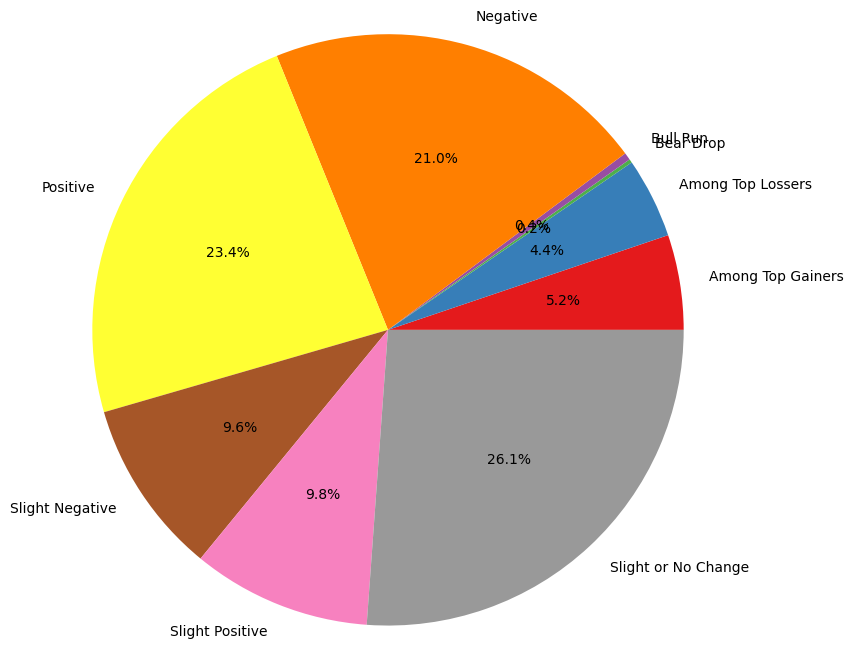

In [59]:
msft_pie_data = msft.groupby(['Trend'])
pie_label = sorted([i for i in msft.loc[:, 'Trend'].unique()])
plt.pie(msft_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2, colors=sns.color_palette('Set1'))

plt.show()

**The stock was in top gainers for the 5.2% of the time and positive for 23.4%. The overall gain for the period of two years is positive for investors.**

# Combined data analysis

In [60]:
df1 = pd.DataFrame(amzn['Close'])
df2 = pd.DataFrame(msft['Close'])
df3 = pd.DataFrame(apple['Close'])
df4 = pd.DataFrame(google['Close'])
df1.rename(columns = {"Close": 'AMZN'}, inplace = True)
df2.rename(columns = {"Close": 'MSFT'}, inplace = True)
df3.rename(columns = {"Close": 'APPLE'}, inplace = True)
df4.rename(columns = {"Close": 'GOOGLE'}, inplace = True)

In [61]:
combined_df = pd.concat([df1,df2,df3,df4],axis =1)
combined_df.dropna(inplace = True)
combined_df

,AMZN,MSFT,APPLE,GOOGLE
Date,,,,
2022-02-11 00:00:00-05:00,153.29,289.73,166.73,134.13
2022-02-14 00:00:00-05:00,155.17,289.69,166.97,135.30
2022-02-15 00:00:00-05:00,156.51,295.06,170.84,136.43
2022-02-16 00:00:00-05:00,158.10,294.72,170.60,137.49
2022-02-17 00:00:00-05:00,154.65,286.09,166.97,132.31
...,...,...,...,...
2024-02-05 00:00:00-05:00,170.31,405.65,187.44,144.93
2024-02-06 00:00:00-05:00,169.15,405.49,189.06,145.41
2024-02-07 00:00:00-05:00,170.53,414.05,189.17,146.68


In [62]:
# Daily return average of stocks 
daily_return = combined_df.pct_change()*100
daily_return.dropna(inplace = True,axis =0)
daily_return

,AMZN,MSFT,APPLE,GOOGLE
Date,,,,
2022-02-14 00:00:00-05:00,1.226434,-0.013806,0.143945,0.872288
2022-02-15 00:00:00-05:00,0.863569,1.853706,2.317782,0.835181
2022-02-16 00:00:00-05:00,1.015910,-0.115231,-0.140482,0.776955
2022-02-17 00:00:00-05:00,-2.182163,-2.928203,-2.127784,-3.767547
2022-02-18 00:00:00-05:00,-1.325574,-0.964731,-0.934300,-1.390673
...,...,...,...,...
2024-02-05 00:00:00-05:00,-0.873057,-1.354506,0.985938,0.968371
2024-02-06 00:00:00-05:00,-0.681111,-0.039443,0.864277,0.331194
2024-02-07 00:00:00-05:00,0.815844,2.111026,0.058183,0.873392


In [63]:
daily_return_avg = daily_return.mean()
daily_return_avg

AMZN      0.059259
MSFT      0.092389
APPLE     0.041124
GOOGLE    0.046276
dtype: float64

### 9. What was the correlation between the daily returns of different stocks?

In [64]:
daily_return.corr()

,AMZN,MSFT,APPLE,GOOGLE
AMZN,1.000000,0.701478,0.627074,0.702558
MSFT,0.701478,1.000000,0.735946,0.723908
APPLE,0.627074,0.735946,1.000000,0.699420
GOOGLE,0.702558,0.723908,0.699420,1.000000


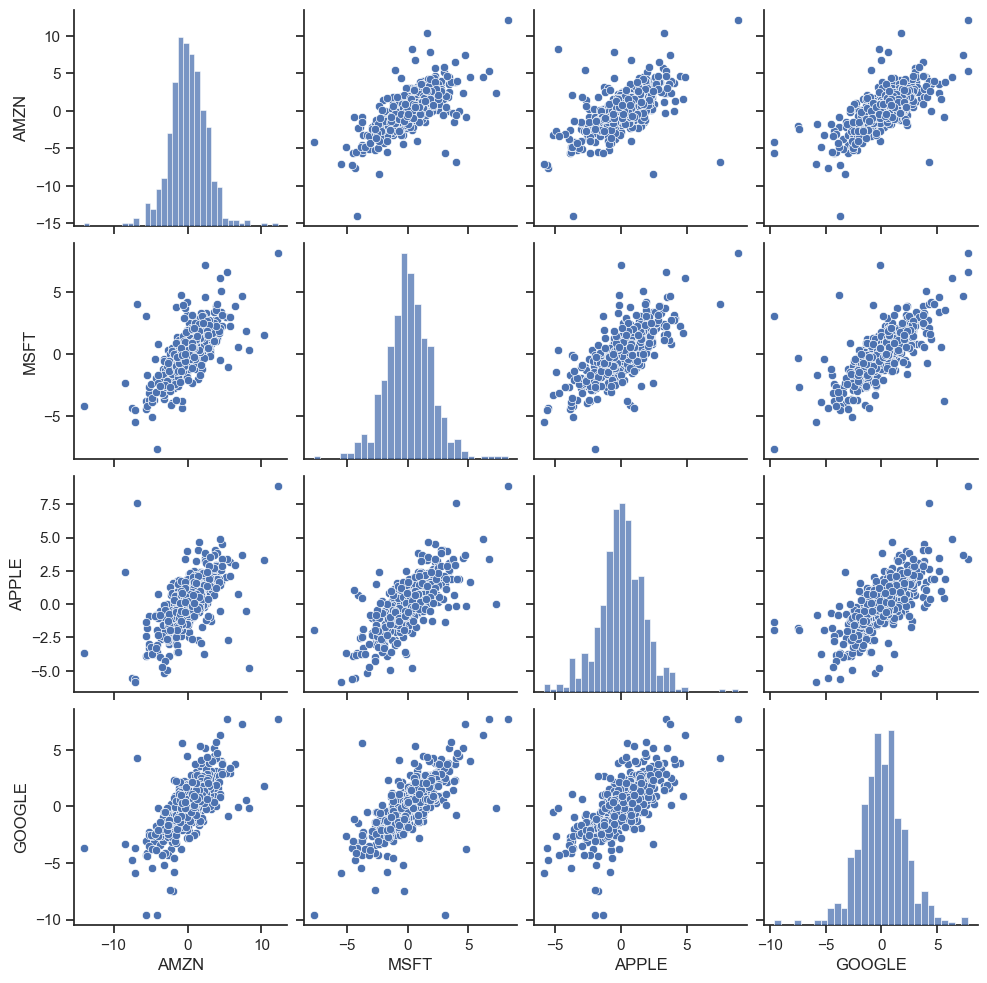

In [65]:
sns.set(style = 'ticks', font_scale = 1.0)
sns.pairplot(daily_return)

**The above two correlation chart depicts significantly higher correlations of the four stocks on each other which can't
be the portfolio you want to keep. As one stock trembles the rest follows the lead.**

count    500.000000
mean       0.059259
std        2.584044
min      -14.052559
25%       -1.444804
50%        0.067726
75%        1.582160
max       12.177850
Name: AMZN, dtype: float64

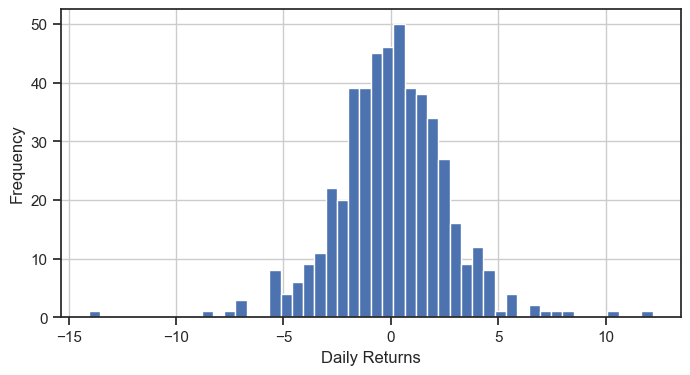

In [71]:
daily_return['AMZN'].hist(bins = 50, figsize = (8,4))
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show
daily_return.AMZN.describe()

**The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.059. During the period, the highest % change in positive direction was observed to be 12.177% and was 14.05% in negative direction. Clearly, we can see the negative returns for the period of two years.**

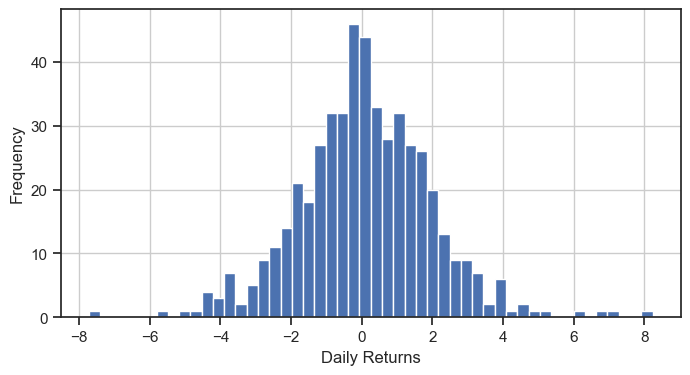

count    500.000000
mean       0.092389
std        1.892563
min       -7.717146
25%       -1.014703
50%        0.056312
75%        1.235976
max        8.228561
Name: MSFT, dtype: float64

In [67]:
daily_return['MSFT'].hist(bins = 50, figsize = (8,4))
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()
daily_return.MSFT.describe()

**The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.092. During the period, the highest % change in positive direction was observed to be 8.22% and was 7.71% in negative direction. For the 75% of the time the return was 1.23. Clearly, we can see the positive returns for the period of two years.**

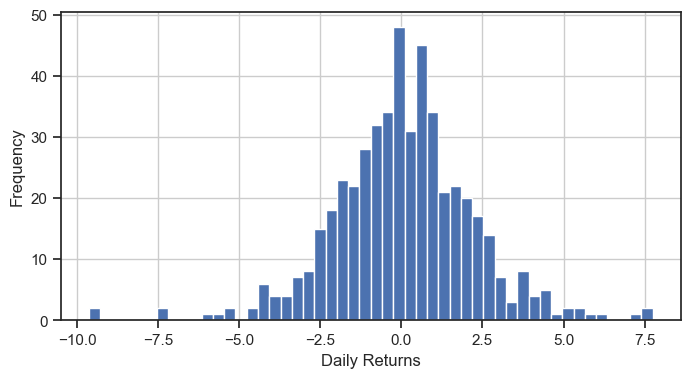

count    500.000000
mean       0.046276
std        2.171713
min       -9.634995
25%       -1.219571
50%        0.032833
75%        1.220981
max        7.745995
Name: GOOGLE, dtype: float64

In [72]:
daily_return['GOOGLE'].hist(bins = 50, figsize = (8,4))
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()
daily_return.GOOGLE.describe()

**The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.046. During the period, the highest % change in positive direction was observed to be 7.74% and was 9.63% in negative direction. Clearly, we can see the negative returns for the period of two years.**

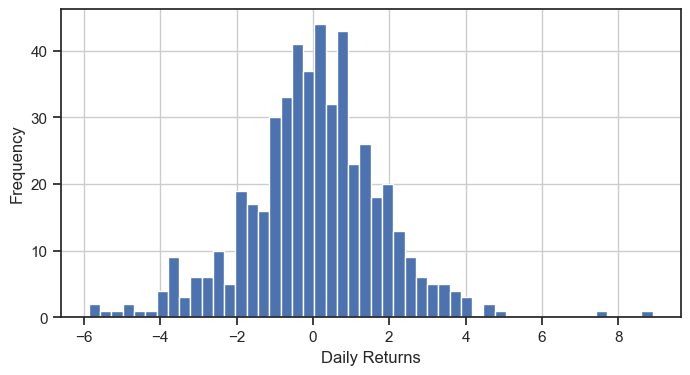

count    500.000000
mean       0.041124
std        1.802533
min       -5.868559
25%       -0.904055
50%        0.072731
75%        1.019049
max        8.898843
Name: APPLE, dtype: float64

In [73]:
daily_return['APPLE'].hist(bins = 50, figsize = (8,4))
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()
daily_return.APPLE.describe()

**The daily returns histogram is slighlty tilted about the left side of the origin. For the past 2 years, the mean daily returns has been about 0.041. During the period, the highest % change in positive direction was observed to be 8.89% and was 5.86% in negative direction. Clearly, we can see the positive returns for the period of two years.**

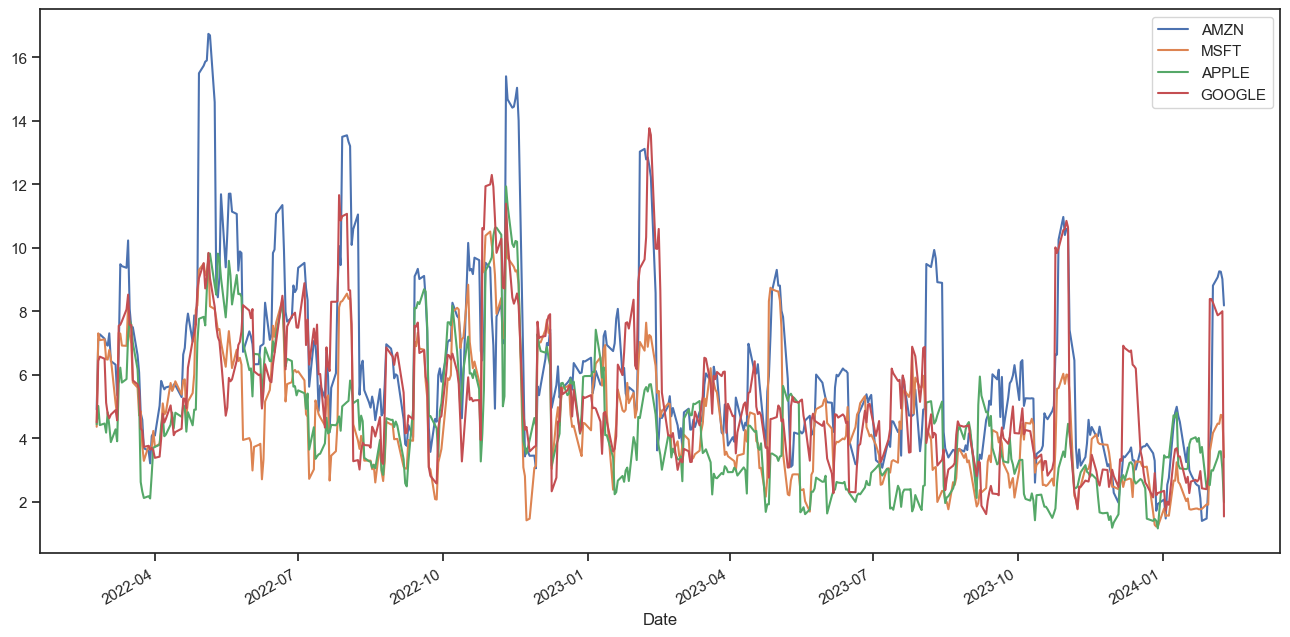

In [70]:
volatility = daily_return[['AMZN', 'MSFT', 'APPLE','GOOGLE']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (16, 8))
plt.show()


**Volatility is one of the most important pillars in financial markets. A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. These movements are due to several factors including demand and supply, sentiment, corporate actions, greed, and fear, etc. Mathematically, volatility is measured using a statistical measure called ‘standard deviation’, which measures an asset’s departure from its average value.**

**Many traders and investors seek out higher volatility investments in order to make higher profits. If a stock does not move, not only it has low volatility, but also it has low gain potential. On the other hand, a stock or other security with a very high volatility level can have tremendous profit potential, but the risk is equally high.**

**In the above chart only Amazon stock is showing the higher volatility or sudden spikes over a due coarse of time which can be a great indication for the investors to gain higher profits.**